# <p style="background-color:red;font-family:arial;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>VERİ ÖN İŞLEME</b></p>
![](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZGZlcWkzN2Y5M2MxNjN4MWxyeTE1endkZnp5MWptajIzdXkwOHBxNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/UDclWKlmfmq7twI3iJ/giphy.gif)

<b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b>[Linkedin](https://www.linkedin.com/in/fatma-nur-azman/) | [Kaggle](https://www.kaggle.com/fnurazman) | [Tableau](https://public.tableau.com/app/profile/fatma.nur.azman/vizzes)

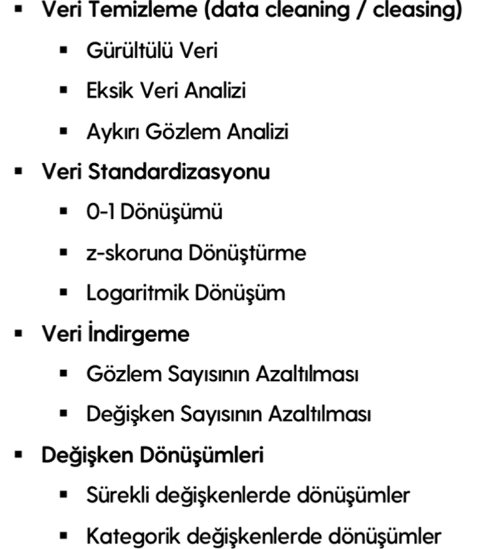

## DATA CLEANING / CLEASING 


### Gurultulu Veri

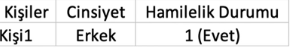

hem erkek olup hem hamile kategorisi evet olamaz yanlış veri.Mesala bir bebek biberonunun 1 milyon tl olması.



### Eksik Veri Analizi (null degerler)

NA her zaman eksiklik göstermez. mesala müşteri kredi kartı harcaması ve kredi kartı sahipliğinde harcamaya NA yazar bunu 0 ile değiştirmek mantıklıdır. Bu yapısal eksiklikdir. aslında bilgi vardır revize edilmelidir. 

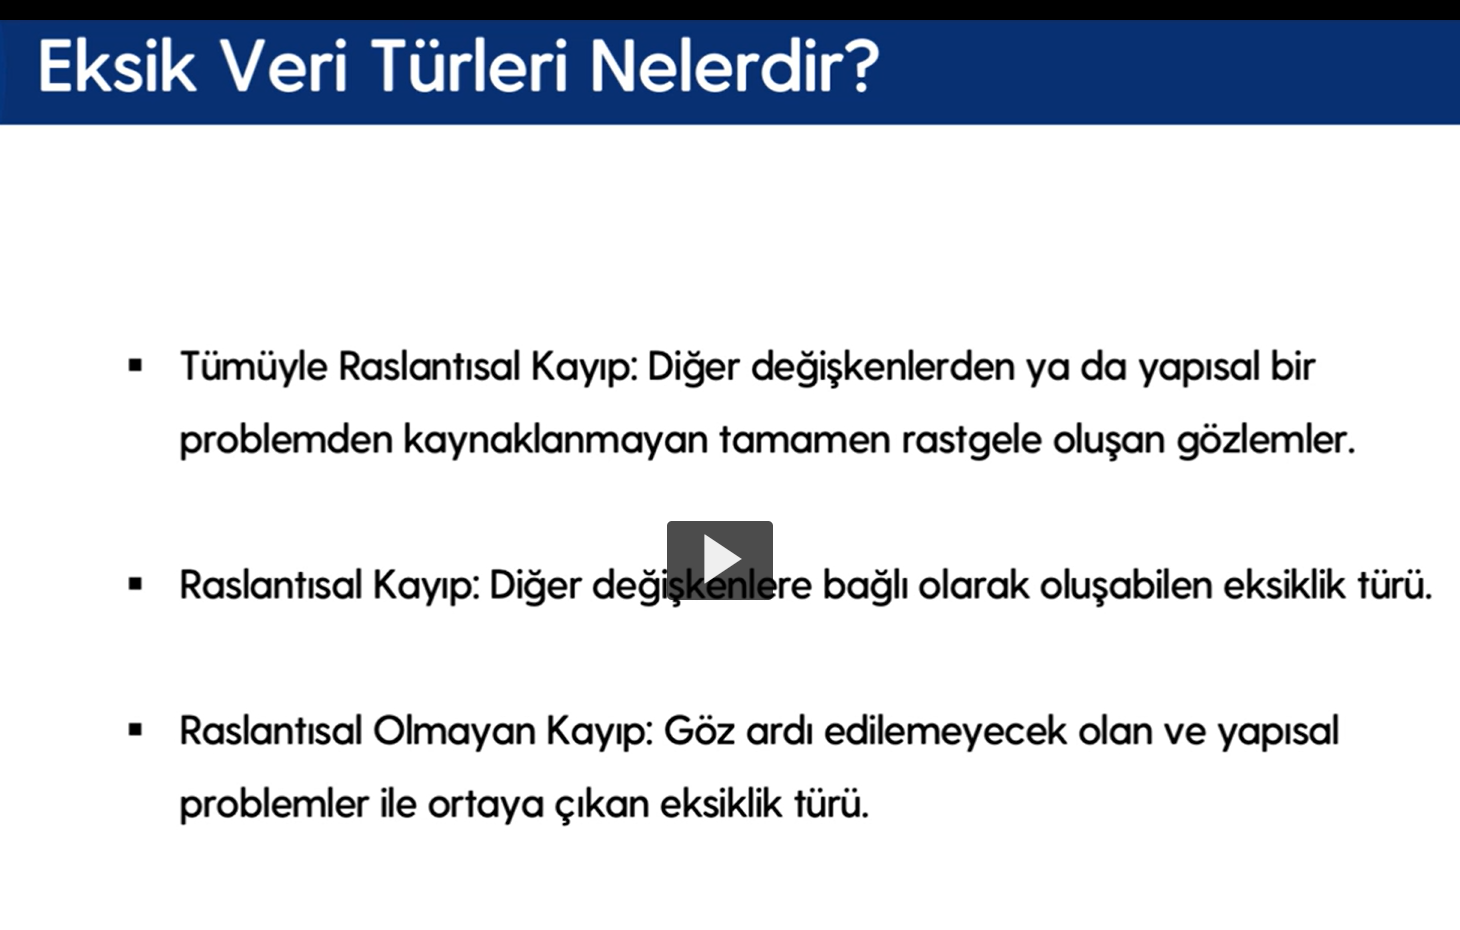

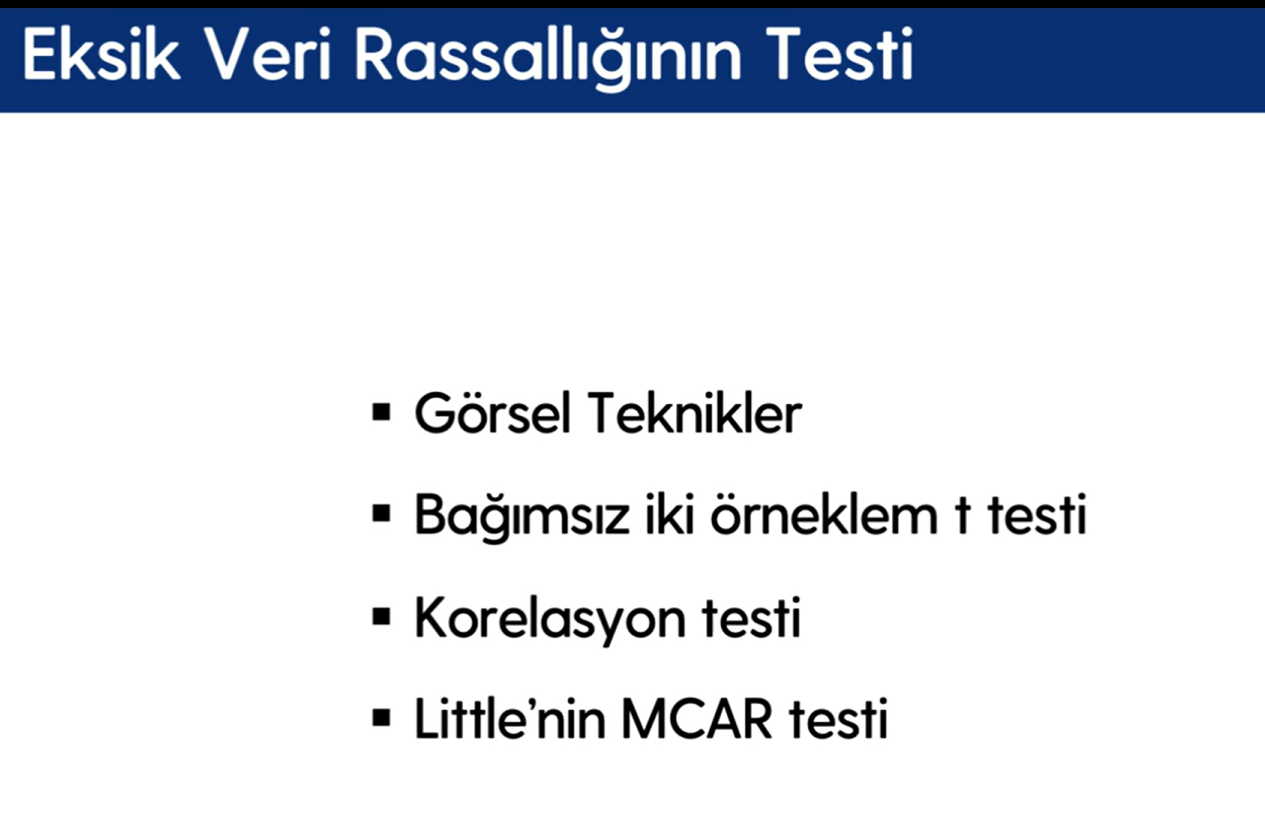

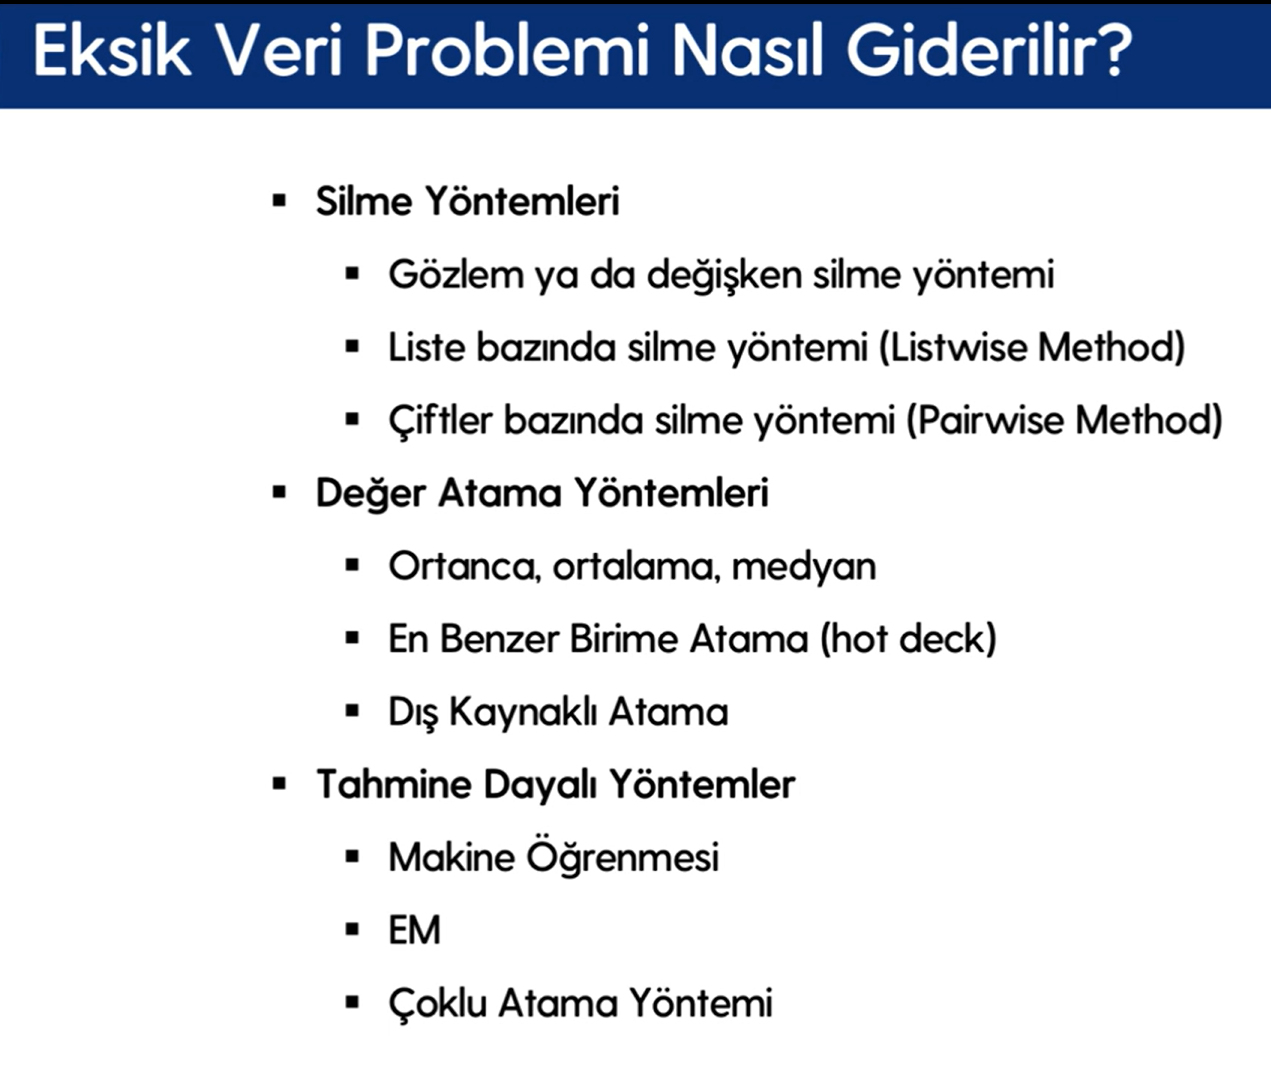

### Aykiri Gozlem Analizi


Veride genel eğilimin oldukça dışına çıkan yada diğer gözlemlerden oldukça farklı olan gözlemlere aykırı veri denir.Nümerik değerdir. Outlier 
Yanlılığa sebep olur. 


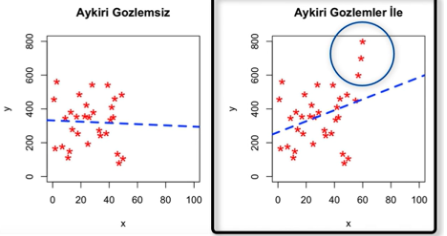

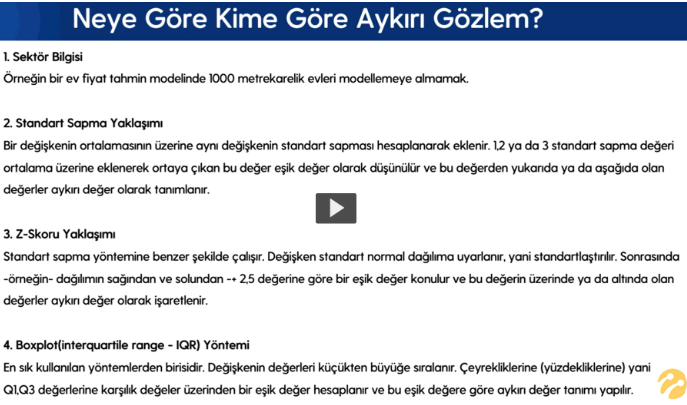

#### Aykırı Değerleri Yakalamak

In [67]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include= ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [68]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

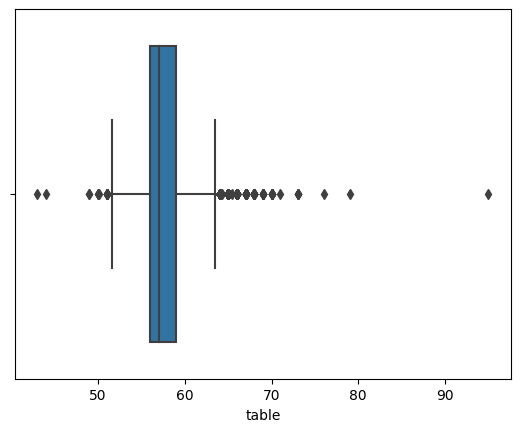

In [69]:
sns.boxplot(x = df_table);

In [70]:
round(df_table.describe().T, 1)

count    53940.0
mean        57.5
std          2.2
min         43.0
25%         56.0
50%         57.0
75%         59.0
max         95.0
Name: table, dtype: float64

In [71]:
from scipy.stats import iqr
IQR = iqr(df_table)

In [72]:
bottom_nerve = np.percentile(df_table,25)  - 1.5*IQR 
upper_nerve = np.percentile(df_table,75)  + 1.5*IQR

In [73]:
df_table[(df_table < bottom_nerve) | (df_table > upper_nerve)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [74]:
df_table[(df_table < bottom_nerve)] # aykırı değerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [75]:
df_table[(df_table < bottom_nerve)].index # indexlerine ulaştık böylece silme yada düzeltme yapabiliriz.

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

#### Aykırı Değer Problemini Çözmek

##### Silme

In [76]:
import pandas as pd 
type(df_table)

pandas.core.series.Series

In [77]:
df_table = pd.DataFrame(df_table)

In [78]:
df_table.shape

(53940, 1)

In [79]:
t_df = df_table[~((df_table < bottom_nerve) | (df_table > upper_nerve)).any(axis = 1)]
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [80]:
t_df.shape

(53335, 1)

#####  ortalama ile doldurma

In [81]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include= ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [82]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [83]:
contrary_tf = (df_table < bottom_nerve)

In [84]:
df_table[contrary_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [85]:
df_table.mean()

57.45718390804598

In [86]:
pd.options.mode.chained_assignment = None 
df_table["contrary_tf"] = df_table.mean()

In [87]:
df_table["contrary_tf"]

57.45718390804598

##### Baskılama Yöntemi  (Aykırı değer yukarıda ise alta yukarıda ise yukarıdaki değerler verilir.)

In [88]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include= ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [89]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [90]:
df_table[contrary_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [91]:
df_table[contrary_tf] = bottom_nerve

In [92]:
df_table[contrary_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

##### Çok değişkenli Aykırı Gözlem Analizi

Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değerleri tanımlayabilmemize imkan sağlar. Örneğin aşağıda bir kişi 17 yaşında 3 kere evlenemez evlense bile aykırıdır. Burada komşululuk yapısı söz konusudur.

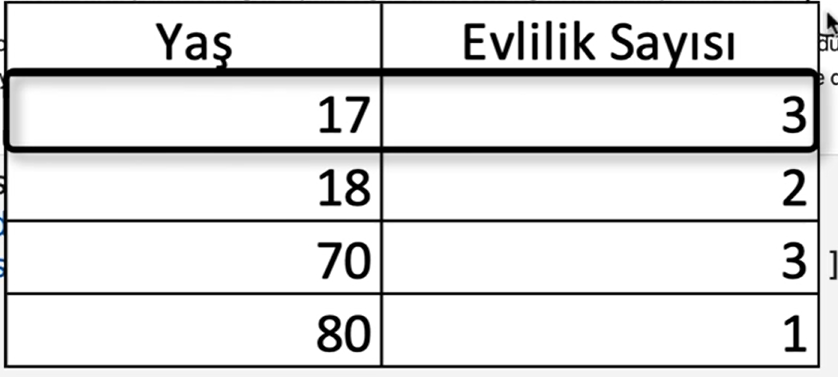

In [93]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include= ["float64", "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [94]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor 
#LocalOutlierFactor (LOF) algoritması, veri noktalarının yerel 
#yoğunluğunu değerlendirerek aykırı değerleri tespit etmeye yardımcı olan bir aykırı değer tespit algoritmasıdır. 

In [95]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # biçimsel özellik tanımladık.

 n_neighbors = Bir veri noktasının yerel yoğunluğunu değerlendirirken dikkate alınacak komşu sayısıdır. Genellikle, veri setinin büyüklüğüne göre belirlenir.Genellikle, çeşitli n_neighbors değerlerini deneyerek ve sonuçları gözlemleyerek en uygun değeri seçmek önerilir. Ayrıca, bu değeri belirlemek için çapraz doğrulama gibi teknikler de kullanılabilir.

contamination = Aykırı değer olarak kabul edilecek veri noktalarının yüzdesini belirler. Bu değer, veri setinin ne kadarının aykırı değerlerden oluştuğunu tahmin etmemize yardımcı olur. Örneğin, contamination=0.1 ise, toplam veri setinin yaklaşık %10'unun aykırı değer olduğunu belirtir.Örneğin, eğer veri setinizde aykırı değerlerin oranı yüksekse, yani veri setinizin önemli bir kısmı aykırı değerlerden oluşuyorsa, contamination değeri yüksek olabilir. Ancak, genellikle aykırı değerlerin oranı düşük olduğunda bu değer küçük bir değer olabilir.

In [96]:
clf

LocalOutlierFactor(contamination=0.1)

In [97]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

fit_predict(df) çağrısı bir makine öğrenimi algoritmasının kullanıldığı bir durumu ifade eder. Bu genellikle bir aykırı değer tespiti algoritmasıdır. Algoritma, veri setini hem öğrenmek (fit) hem de etiketlemek (predict) için kullanılır.Burada fit adımı, veri seti üzerinde modelin eğitildiği adımdır. Model, genellikle normal veri desenlerini öğrenir ve bunları kullanarak aykırı değerleri tanımlamak için bir eşik değeri belirler. predict adımı ise, öğrenilen modelin kullanılarak veri setindeki her bir örneğin etiketlenmesidir. Bu etiketleme işlemi, her bir örneğin normal (aykırı değil) veya aykırı olarak sınıflandırılması anlamına gelir.

In [98]:
df_scores = clf.negative_outlier_factor_  # tüm gözlemlerin skoru

clf.negative_outlier_factor_ = Local Outlier Factor (LOF) algoritması tarafından hesaplanan ve her veri noktası için bir aykırılık skoru içeren bir özelliktir.LOF algoritmasının hesaplama sonucunda elde edilen aykırılık skorlarını içerir. Bu skorlar, her bir veri noktasının ne kadar aykırı olduğunu belirten negatif değerlerdir. Daha düşük bir negatif aykırılık skoru, bir veri noktasının daha aykırı olduğunu gösterir. Bu skorlar, veri setindeki her bir veri noktası için bir dizi değer olarak tutulur.

In [99]:
df_scores [0:10] # head çalışmadı çünkü bu series olduğu için 

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [100]:
np.sort(df_scores)[0:20] # genelde birbirine yakın. bir eşik değeri bul. en hızlı azalışı al.-5.86 gibi

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [101]:
 threshold_value = np.sort(df_scores)[13] # biz bunu eşik değer kabul ettik. varsayım
 threshold_value

-3.823787967755565

In [102]:
contrary_tf = df_scores >  threshold_value

In [103]:
yeni_df = df[df_scores >  threshold_value] # eşik değerin üzerinde olan tüm değerleri aldık aykırı değerleri sildik. 
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [104]:
df[df_scores <  threshold_value]  # bunlarda aykırı değerler

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


baskılama 

In [105]:
df[df_scores <  threshold_value]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [106]:
df[df_scores ==  threshold_value]  # bu yukarıdaki 13. indexli satır. 

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


baskılama ile 

In [107]:
print_value = df[df_scores ==  threshold_value]

In [108]:
    contradictions = df[~contrary_tf]
    contrary_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [109]:
res = contradictions.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [110]:
res[:] = print_value.to_records(index=False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [111]:
df[~contrary_tf] # değişmemiş.

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [112]:
df[~contrary_tf] = pd.DataFrame(res, index=df[~contrary_tf].index )


In [113]:
df[~contrary_tf] 

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


### Eksik Gozlem Analizi

EKSİK VERİYİ SİLMEDEN İNCELEMEN GEREKİR 

1. Veri setinde eksikliğin yapısal mı yoksa rastgele mi oluştu bu incelenmeli. Aşağıdaki durum yapısal bir eksikliktir. bu veriyi mean yada median la dolduramazsın. 
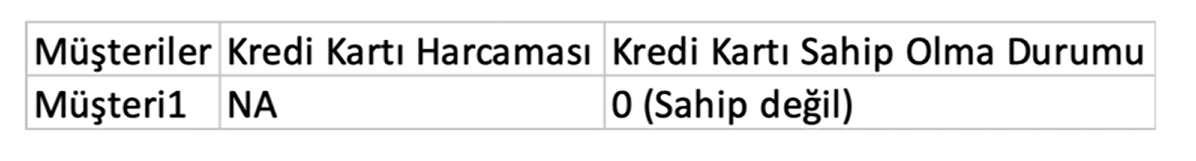 
2. NA her zaman eksiklik ifade etmez. 
3. Bilgi kaybı

Tümüyle rastlantısal kayıp : Tamamen rastlantısal.

rastlantısal kayıp : Diğer değişkenlere bağlı olarak oluşabilen eksiklik.

 rastlantısal olmayan kayıp : yapısal problemler ile ortaya çıkan kayıp.

#### Eksik Veri Rassallığının Testi

• Görsel Teknikler

• Bağımsız iki örneklem t testi

• Korelasyon testi

• Little'nin MCAR testi

#### Eksik Veri Problemi Nasıl Giderilir?

Silme Yöntemleri

• Gözlem ya da değişken silme yöntemi

• Liste bazında silme yöntemi (Listwise Method)

• Çiftler bazında silme yöntemi (Pairwise Method)

 Değer Atama Yöntemleri
 
• Ortanca, ortalama, medyan

• En Benzer Birime Atama (hot deck)

• Dış Kaynaklı Atama

Tahmine Dayalı Yöntemler

#### Hızlı Çözüm

In [114]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
V3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
df = pd.DataFrame(
    {"V1":V1,
    "V2" :V2,
    "V3" :V3}
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [115]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [116]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [117]:
df.isnull().sum().sum()

7

In [118]:
df[df.isnull().any(axis=1)]# (1 tane bile boş varsa sütunları getir)

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [119]:
df[df.notnull().all(axis=1)] # (tüm dolu sütunları getir)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [120]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()] # df[df.notnull().all(axis=1)] aynı çıktıyı verir.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [121]:
df.dropna(inplace=False)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [122]:
df["V1"].fillna(df["V1"].mean(), inplace=False) # inplace = True yaparsan kalıcı olur.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [123]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [124]:
df.apply(lambda x: x.fillna(x.mean())) # tüm data frame uygular.1. yol

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [125]:
df.fillna(df.mean()) # tüm data frame uygular. 2. yol

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [126]:
df.where(pd.notna(df), df.mean(), axis="columns")  # tüm data frame uygular. 3. yol

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


V1 ve V2 yi mean ile V3 ü median ile doldurmak istersek =

In [127]:
df.fillna(df.mean()["V1":"V2"]) 

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [128]:
df["V3"].fillna(df["V3"].median()) 

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

#### Eksik veri yapısının görselleştirilmesi

In [129]:
# !pip install missingno

In [130]:
import missingno as msno

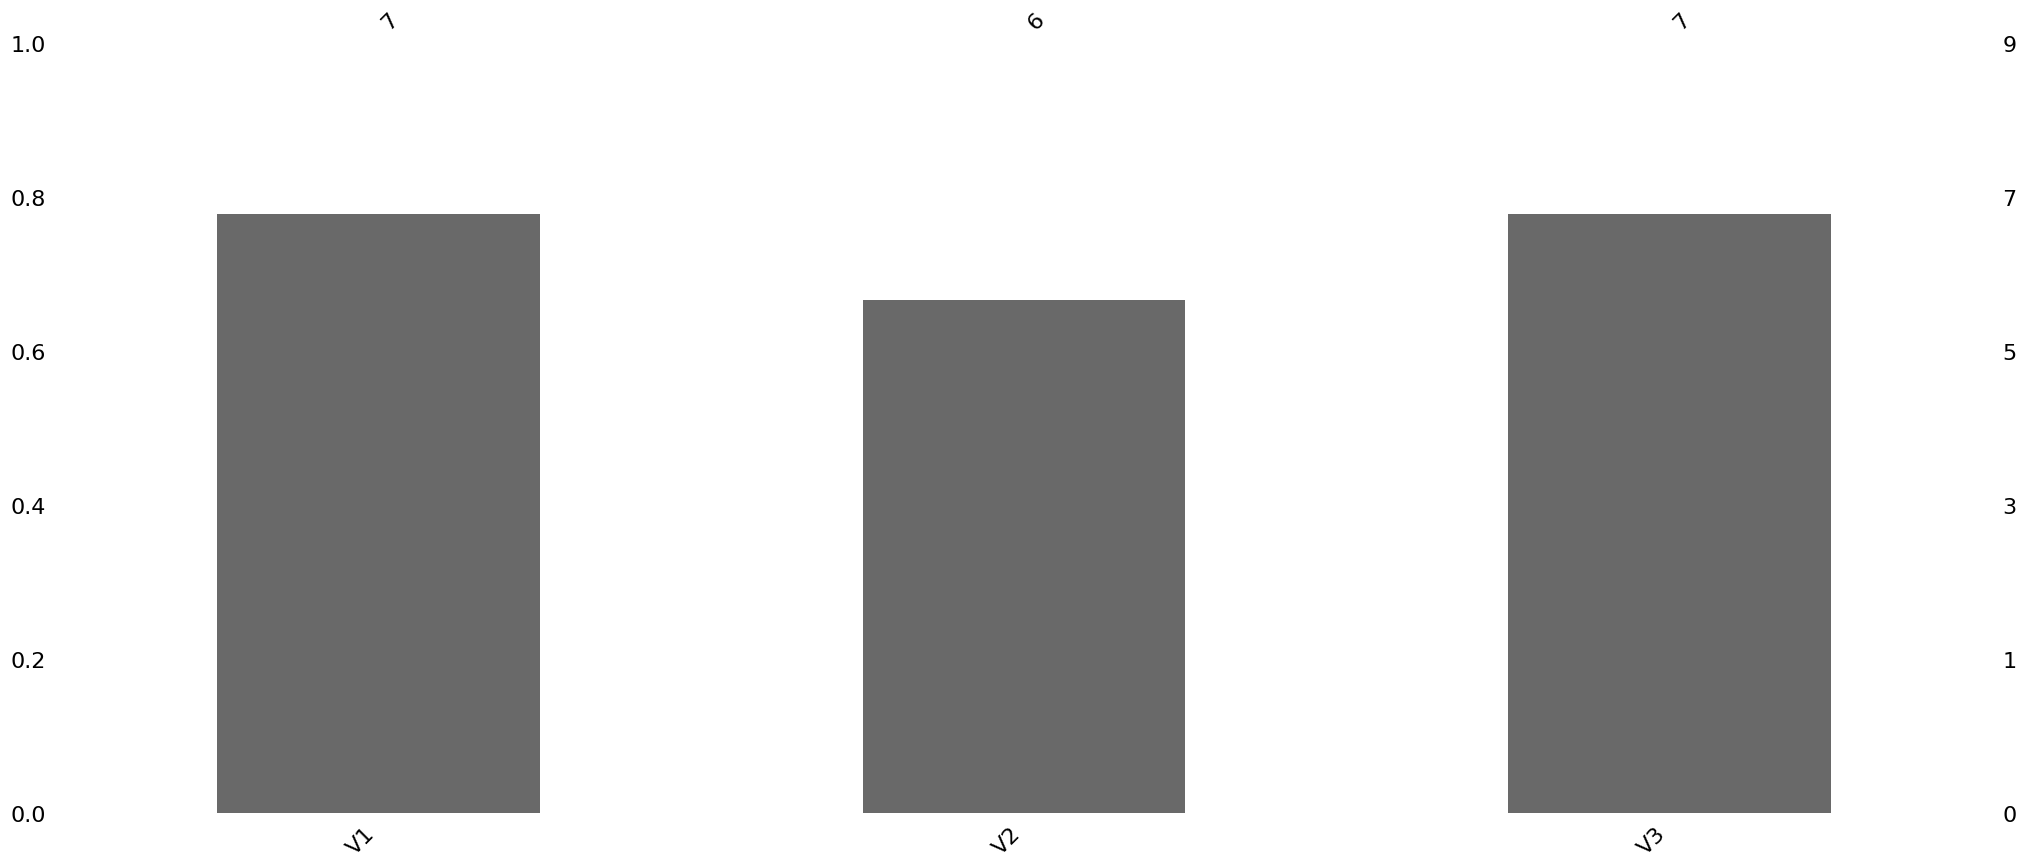

In [131]:
msno.bar(df);

<Axes: >

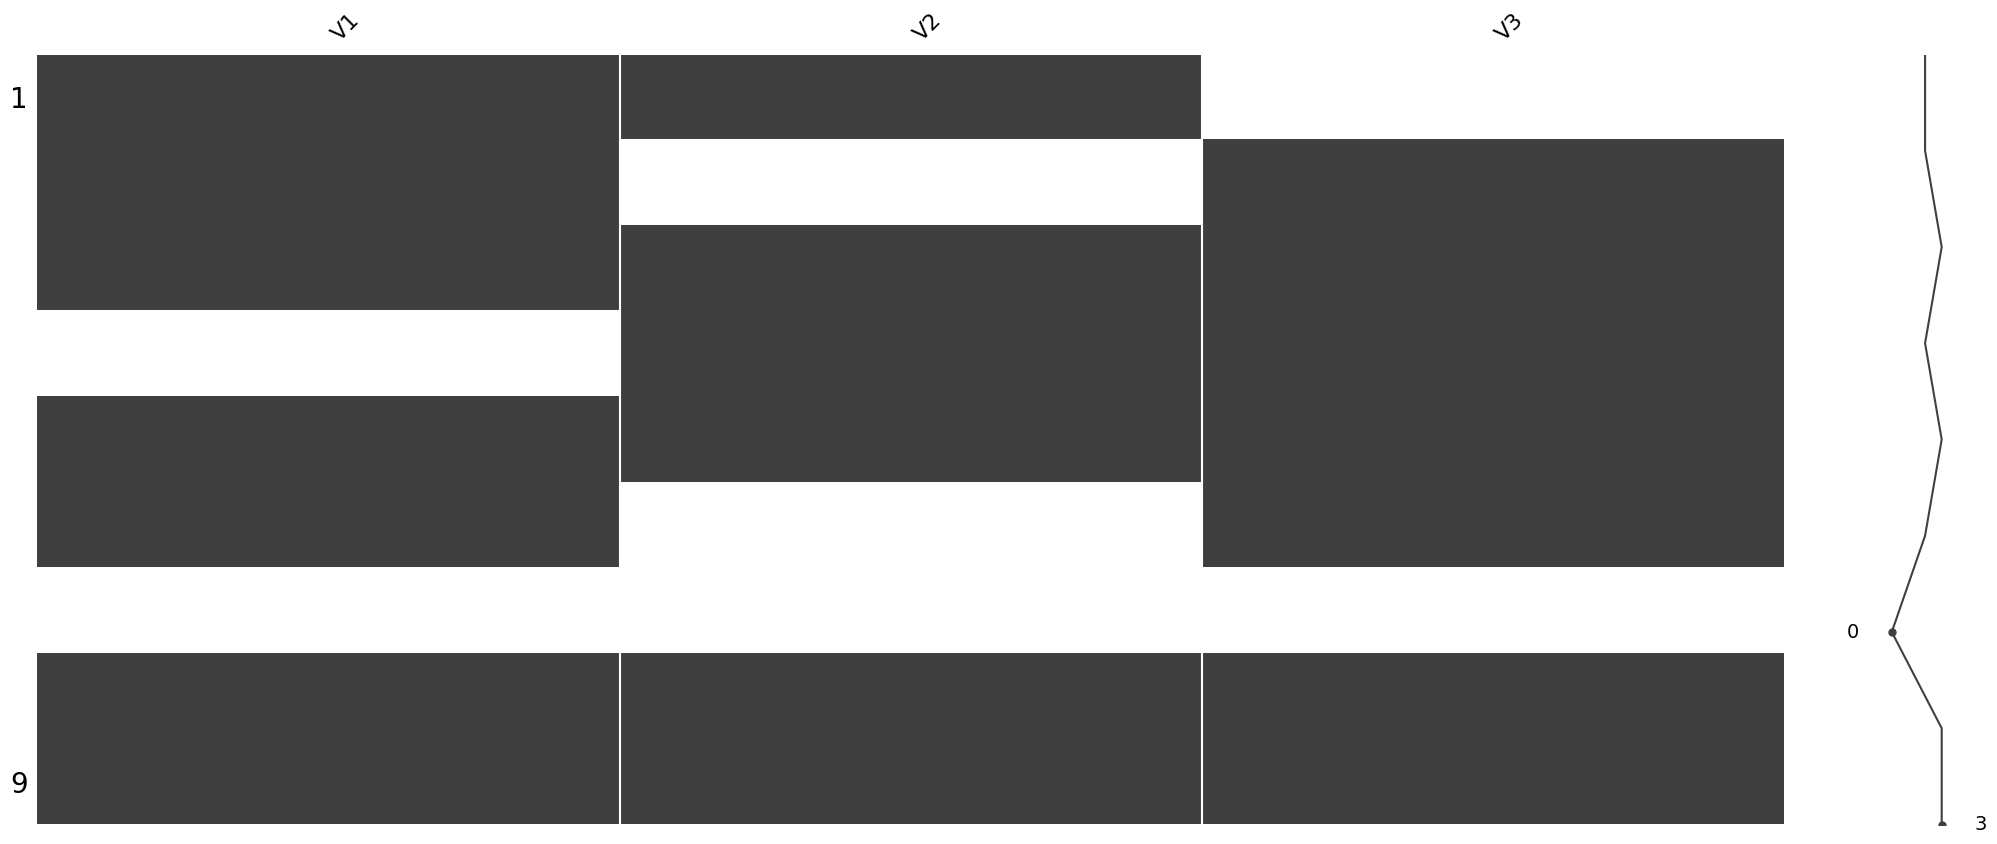

In [132]:
msno.matrix(df) # yapısal bozuklukları gösterir.

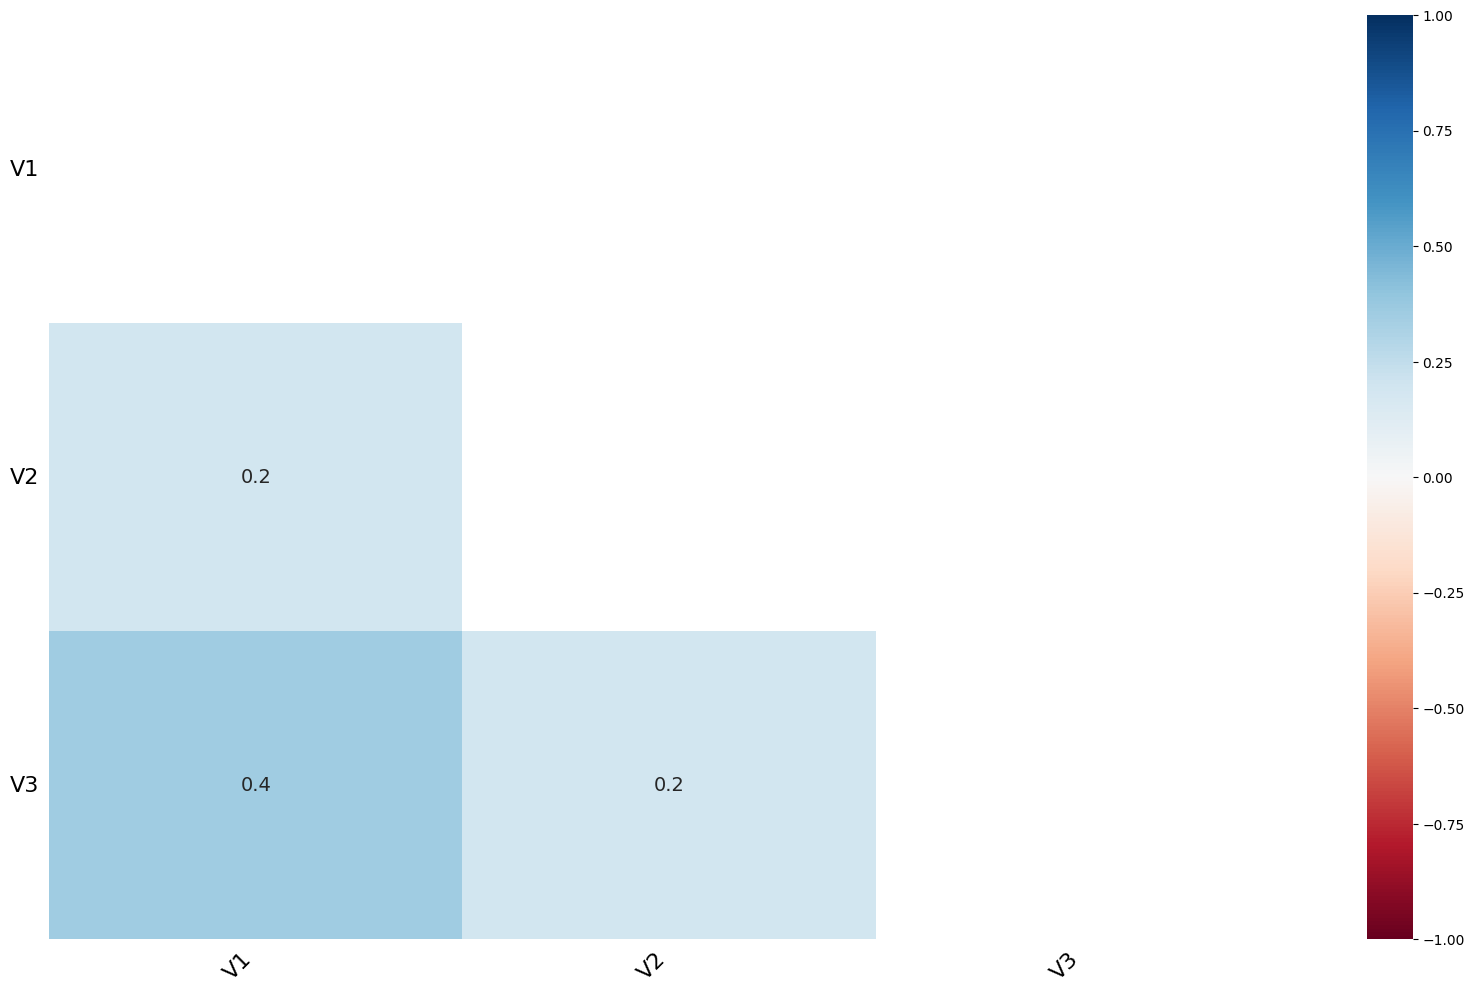

In [133]:
msno.heatmap(df); # korelasyonu gösterirr. değişkenler arasındaki ilişkiyi gösterir.

#### Silme Yöntemleri

In [134]:
df.dropna() # en az 1 adet eksik varsa tüm satırı siler.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [135]:
df.dropna(how="all", axis=1) # aynı anda tüm değerler eksikse sil.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [136]:
df.dropna(how="all", axis=0, inplace=False) #6. satırı silmiş oldu. inplace=True yaparsan kalıcı siler.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Kategorik Değişken Kırılımında Değer Atama

örneğin elimizde bir şirkette çalışan kişilerin verisi olsun. Eksik verileri departmanlara göre doldurmamız gerekir.

In [137]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
V3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
V4 = np.array(["IT","IT","IK", "IK","IK","IK","IK","IT","IT" ])
df = pd.DataFrame(
    {"salary":V1,
    "V2" :V2,
    "V3" :V3,
    "Department" : V4}
)
df

,salary,V2,V3,Department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [138]:
df.groupby("Department")["salary"].mean()

Department
IK    4.666667
IT    7.000000
Name: salary, dtype: float64

In [139]:
df["salary"].fillna(df.groupby("Department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: salary, dtype: float64

In [140]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V4 = np.array(["IT",np.nan,"IK", "IK","IK","IK","IK","IT","IT" ], dtype=object)
df = pd.DataFrame(
    {"salary":V1,
    "Department" : V4}
)
df

,salary,Department
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [141]:
df["Department"].mode()[0]

'IK'

In [142]:
#1. yol
df["Department"].fillna(df["Department"].mode()[0], inplace=False) # inplace =True dersen kalıcı olur.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: Department, dtype: object

In [143]:
#2. yol
df["Department"].fillna(method="bfill", inplace=False) # kendisinden sonra gelen değer ile doldurdu.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: Department, dtype: object

In [144]:
#3. yol
df["Department"].fillna(method="ffill", inplace=False) # kendisinden önce gelen değer ile doldurdu.

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: Department, dtype: object

#### Tahmine Dayalı Değer Atama

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64", "int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [146]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

1 . YOL KNN.imputer

In [147]:
# !pip install ycimpute

In [148]:
from ycimpute.imputer import knnimput # en yakın komşuluk algoritması - ML algoritması

In [149]:
var_names =  list(df)  # columns isimlerini listeye çevirdik

In [150]:
n_df = np.array(df) # df array çevirdik.

In [151]:
n_df.shape

(891, 6)

ML algoritması knnimput.KNN(k = 4) komşu ilişkilerine göre doldurur.  .complete(n_df) dolldur demek. n_df i doldur demiş olduk.

In [152]:
dff = knnimput.KNN(k = 4).complete(n_df) 

Imputing row 1/891 with 0 missing, elapsed time: 0.275
Imputing row 101/891 with 0 missing, elapsed time: 0.279
Imputing row 201/891 with 0 missing, elapsed time: 0.281
Imputing row 301/891 with 1 missing, elapsed time: 0.283
Imputing row 401/891 with 0 missing, elapsed time: 0.286
Imputing row 501/891 with 0 missing, elapsed time: 0.287
Imputing row 601/891 with 0 missing, elapsed time: 0.291
Imputing row 701/891 with 0 missing, elapsed time: 0.292
Imputing row 801/891 with 0 missing, elapsed time: 0.294


In [153]:
type(dff)

numpy.ndarray

In [154]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [155]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

2. YOL EM algoritması

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64", "int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [157]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [158]:
from ycimpute.imputer import EM

In [159]:
var_names =  list(df)  # columns isimlerini listeye çevirdik

In [160]:
n_df = np.array(df) # df array çevirdik.

In [161]:
dff = EM().complete(n_df)

In [162]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [163]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## VERİ STANDARDİZASYONU 

Değişken Dönüşümü         = Değişken yapısı değişir. örneğin kadın erkeğe 0 veya 1 değeri vermemiz gibi. Taşıdığı bilgi değişmez yapısı değişir.Değerler 0 ile 1 arasına değiştirir.
Değişken Standardizasyonu = Kendi içindeki yapısı bozulmaz düzene girer. 

In [164]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6, 12, 5, 6, 14])
df = pd.DataFrame(
    {"V1" : V1,
     "V2" : V2,
     "V3" : V3
    })
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Değişken Standartlaştırma

Standardizasyon

In [165]:
from sklearn import preprocessing

In [166]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [167]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


Normalizasyon

In [168]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

Min-Max Dönüşümü

In [169]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [170]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

### Değişken Dönüşümleri

In [171]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 dönüşümü (label encoder ile yapılır)


In [172]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [173]:
lbe.fit_transform(df["sex"])  # cinsiyeti ML algoritması için 0 ve 1 dönüştürmüş olduk. 

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [174]:
df["new_sex"]= lbe.fit_transform(df["sex"]) 

In [175]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### 1 ve Diğerleri (0) Dönüşümü (3 veya 4 sınıflı bağımlı değişken olduğunda)


In [176]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [177]:
df["day"].str.contains("Sun") # day sütununda Sun varsa True döndürür.

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [178]:
import numpy as np
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

eğer yukarıda da yazdığım kodu sağlıyorsa 1 sağlamıyorsa 0 ver.

In [179]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1,0
235,10.07,1.25,Male,No,Sat,Dinner,2,1,0
118,12.43,1.80,Female,No,Thur,Lunch,2,0,0
193,15.48,2.02,Male,Yes,Thur,Lunch,2,1,0
18,16.97,3.50,Female,No,Sun,Dinner,3,0,1
188,18.15,3.50,Female,Yes,Sun,Dinner,3,0,1
39,31.27,5.00,Male,No,Sat,Dinner,3,1,0
59,48.27,6.73,Male,No,Sat,Dinner,4,1,0
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0,0
32,15.06,3.00,Female,No,Sat,Dinner,2,0,0


### Çok Sınıflı Dönüşüm


In [180]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()


In [181]:
lbe.fit_transform(df["day"]) # df day içindeki 4 sınıfı dönüştürdü.

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

Bu uygulamayı yaptığımızda algoritmanın kafası karışacak ve bağımlı değişkenş tanıyamayacak. Çünkü artık sayısal değeri algılayacak. ve yüksek sayıyı nomiinal olarak daha üstte görecektir. Yanlılığa ve gürültüye sebep olacak. Bu durumda One Hot Encoding yapılmalı.

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [182]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [183]:
df_one_hot.head() # sex_Male	sex_Female 2 adet yeni sütun getirdi. 

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


Bir değişkeni ifade eden başka bir değişken varsa bu duruma dummy değişken tuzağı denir. Bunu engellemek için 2 aynı bilgiyi taşıyan sütundan birini kaldırmalıyız. 

In [184]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"])

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0


# <p style="background-color:red;font-family:arial;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Katkıda bulunduğunuz için teşekkür ederim.
</b></p>

<b>please do not forget to follow us </b>[Linkedin](https://www.linkedin.com/in/fatma-nur-azman/) | [Kaggle](https://www.kaggle.com/fnurazman) | [Tableau](https://public.tableau.com/app/profile/fatma.nur.azman/vizzes) | [Source](https://gelecegiyazanlar.turkcell.com.tr/) 